# Klasifikasi gambar Pokemon menggunakan Convolutional Neural Network

In [18]:
from __future__ import print_function

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os
import cv2
import glob
from collections import Counter
from imutils import paths
import imutils
import pickle
import seaborn as sns

RANDOM_STATE=42

%matplotlib inline

### Memuat dan mengolah gambar

In [3]:
!ls datasets | head -10

fire.0.png
fire.1.png
fire.10.png
fire.100.png
fire.101.png
fire.102.png
fire.103.png
fire.104.png
fire.105.png
fire.106.png


ls: write error


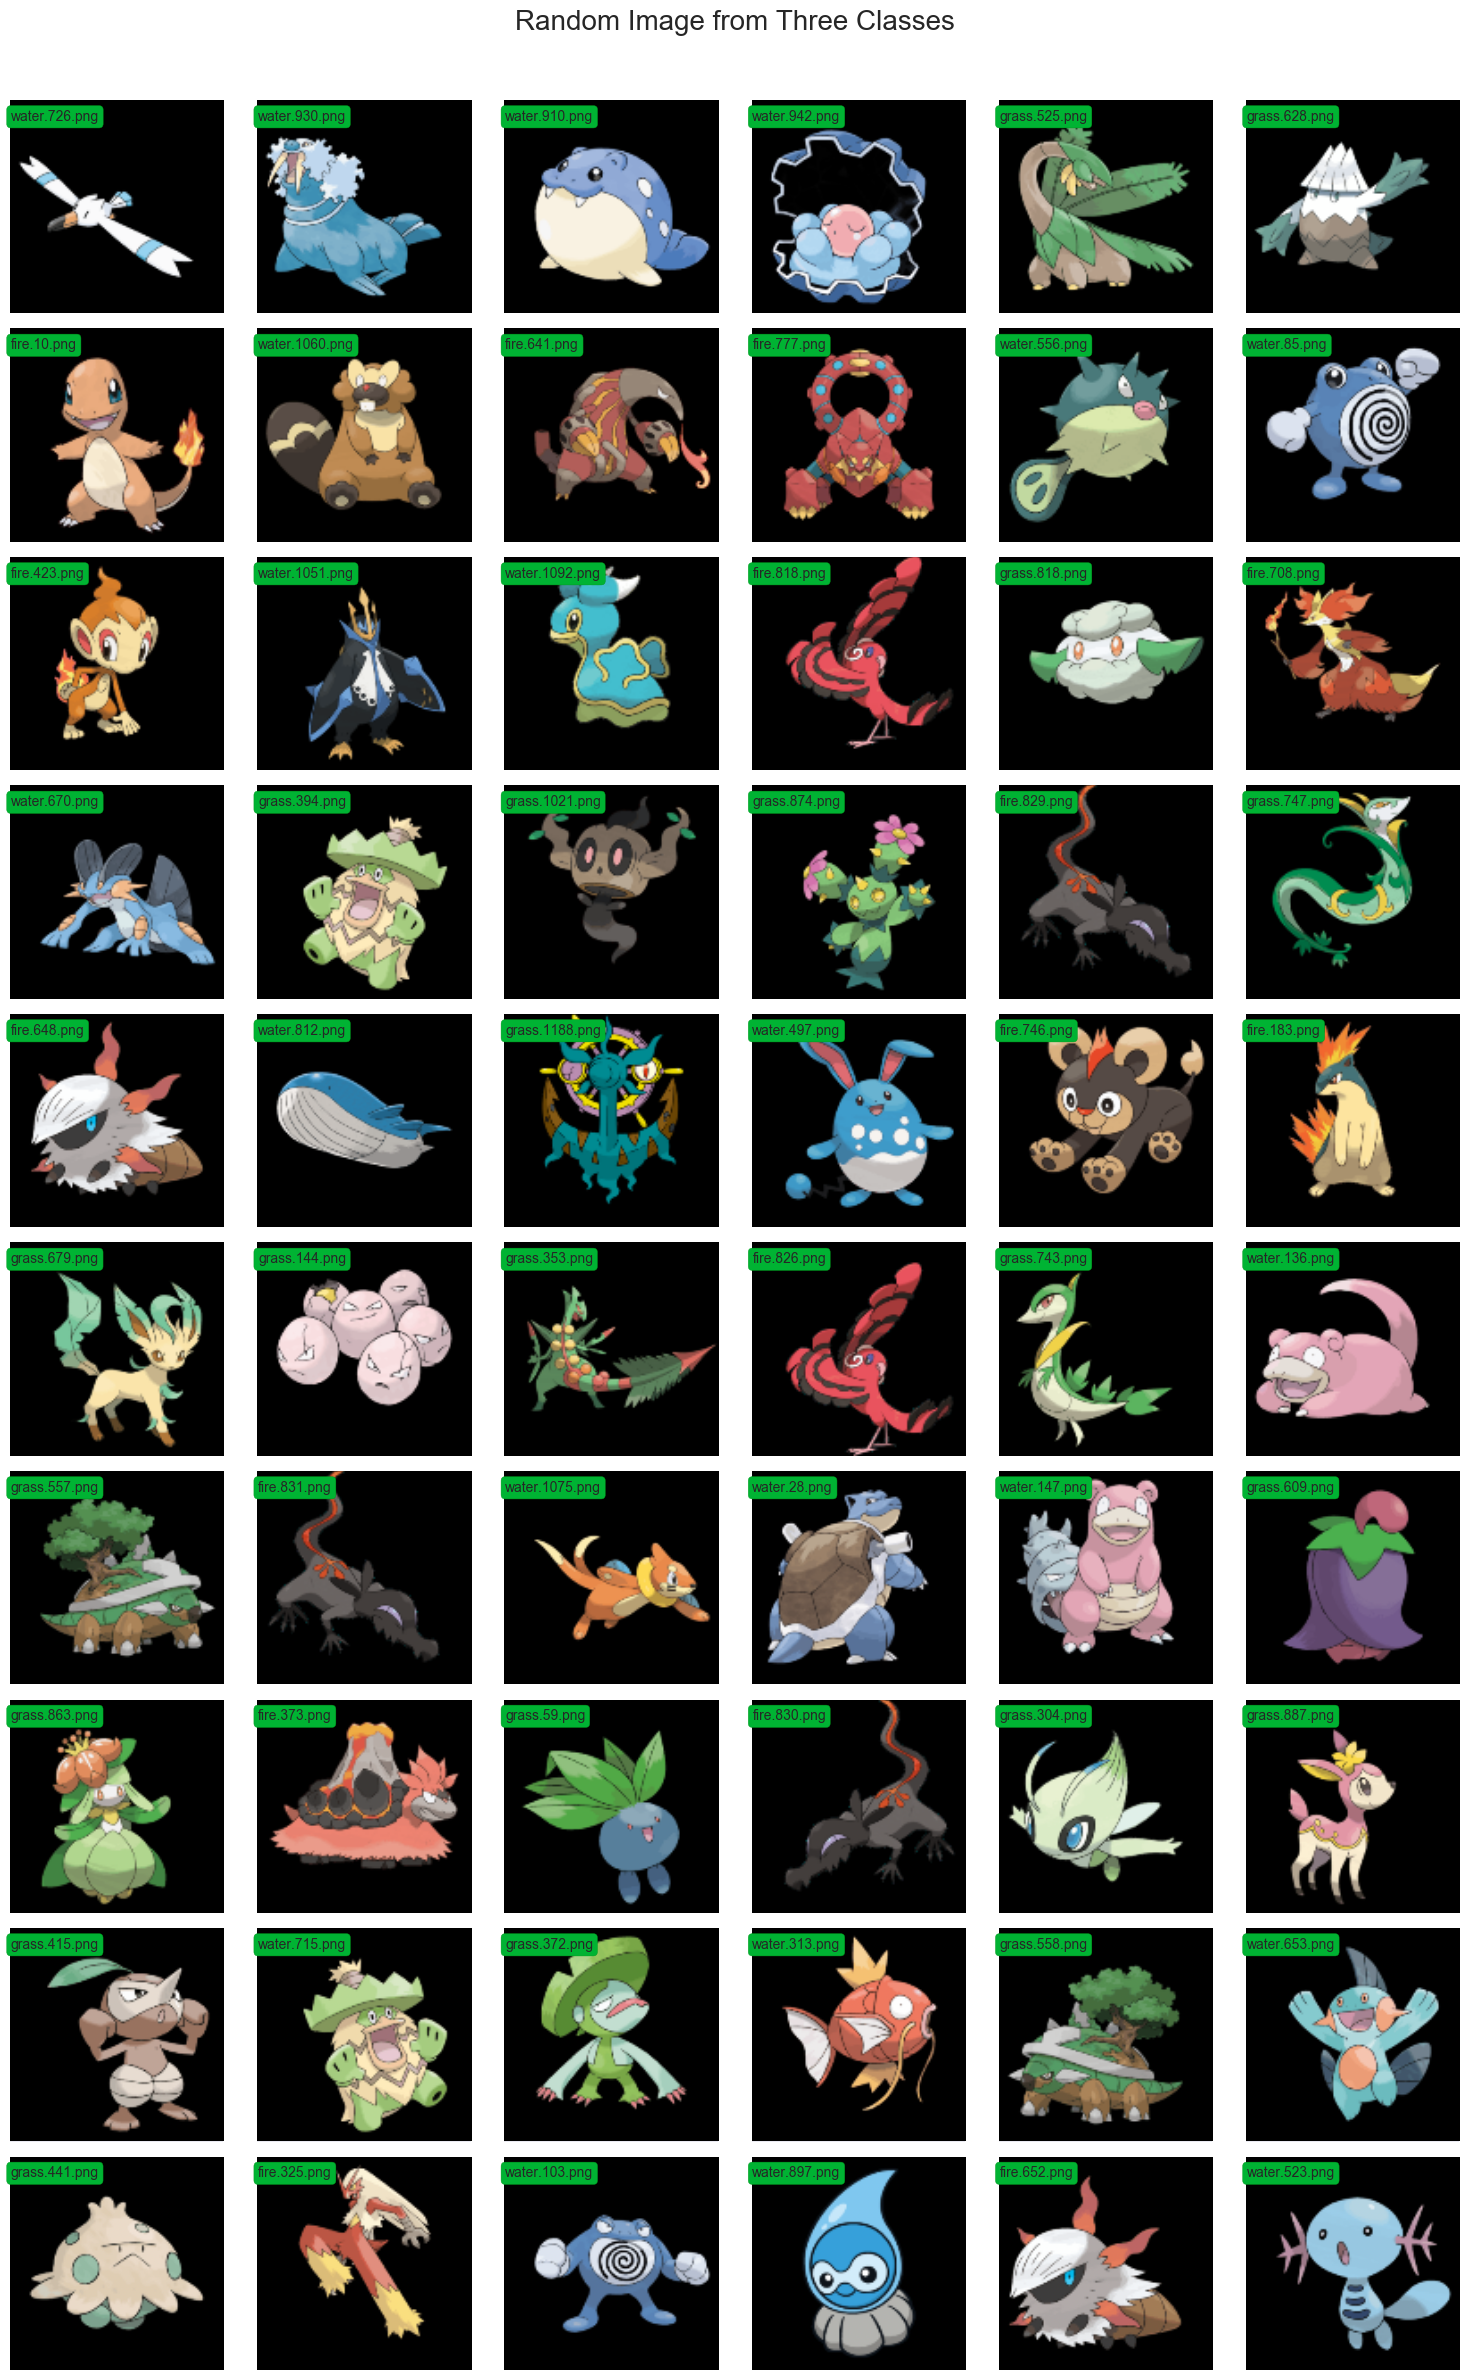

In [4]:
root_dir = 'datasets/'
rows = 10
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Three Classes', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break

        all_files = os.listdir(root_dir)
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, 5, str(rand_img), size=10, rotation=0,
                ha="left", va="top",
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

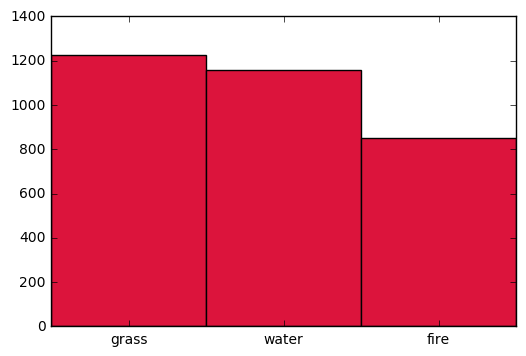

In [4]:
gambar=[]
kelas=[]
for img in glob.glob('datasets/*.png'):
    kelas+=[str(img).split('\\')[1].split('.')[0]]
    n=cv2.imread(img)
    gambar += [np.array(n)]


labels, values = zip(*Counter(kelas).items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width, color='crimson')
plt.xticks(indexes+width*0.5, labels)
plt.show()

In [13]:
data=[]
label=[]

for img in glob.glob('datasets/*.png'):
    label += [str(img).split('\\')[1].split('.')[0]]
    image = cv2.imread(img)
    image = cv2.resize(image, (28,28))
    data +=  [np.array(image)]

np.save('pokemon.npy',data)
np.save('pokemon_labels.npy',label)

In [14]:
X = np.load('pokemon.npy')
y = np.load('pokemon_labels.npy')

print(X.shape, y.shape)

(3232, 28, 28, 3) (3232,)


In [16]:
le = LabelEncoder()
y_label = le.fit_transform(y)

In [24]:
img_rows, img_cols = 28, 28

batch_size = 25
num_classes = 3
epochs = 15

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,y_label,test_size=0.25,random_state=RANDOM_STATE)

if K.image_dim_ordering() == 'th':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [22]:
x_train = x_train.astype('float32')
x_train = x_train/255.0
x_test = x_test.astype('float32')
x_test = x_test/255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (2424, 28, 28, 3)
2424 train samples
808 test samples


In [25]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Klasifikasi gambar

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


model.save('modelcnn.h5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 2424 samples, validate on 808 samples
Epoch 1/15
2424/2424 [==============================] - 67s - loss: 0.8894 - acc: 0.6052 - val_loss: 0.7221 - val_acc: 0.7290
Epoch 2/15
2424/2424 [==============================] - 66s - loss: 0.5945 - acc: 0.7768 - val_loss: 0.5698 - val_acc: 0.7710
Epoch 3/15
2424/2424 [==============================] - 67s - loss: 0.4549 - acc: 0.8313 - val_loss: 0.4873 - val_acc: 0.8144
Epoch 4/15
2424/2424 [==============================] - 70s - loss: 0.3326 - acc: 0.8775 - val_loss: 0.4073 - val_acc: 0.8403
Epoch 5/15
2424/2424 [==============================] - 70s - loss: 0.2268 - acc: 0.9220 - val_loss: 0.4511 - val_acc: 0.8317
Epoch 6/15
2424/2424 [==============================] - 76s - loss: 0.1700 - acc: 0.9402 - val_loss: 0.3408 - val_acc: 0.8676
Epoch 7/15
2424/2424 [==============================] - 70s - loss: 0.1300 - acc: 0.9600 - val_loss: 0.3816 - val_acc: 0.8527
Epoch 8/15
2424/2424 [==============================] - 74s - loss: 0.0

In [27]:
y_pred = model.predict_classes(x_test)

800/808 [============================>.] - ETA: 0s

In [28]:
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)

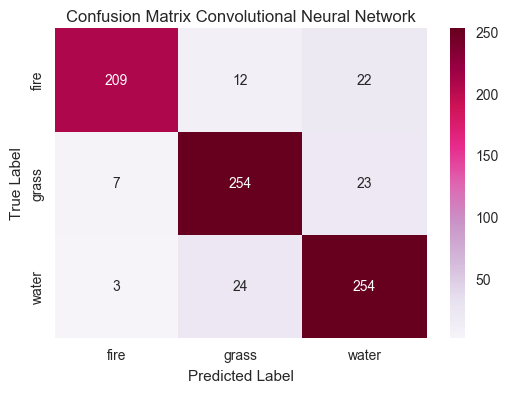

In [30]:
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd") #-___-
ax.set_title('Confusion Matrix Convolutional Neural Network')
ax.set_yticklabels(le.inverse_transform([2,1,0]))
ax.set_xticklabels(le.inverse_transform([0,1,2]))
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()